In [1]:
import re
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
from better_profanity import profanity
import spacy

In [2]:
def split_by_character_count(word_list):
    count_dict = defaultdict(list)
    for word in word_list:
        count_dict[len(word)].append(word)
    return count_dict

def plot_word_counts(counts_dict):
    max_count = max(counts_dict.keys())
    x = list(range(max_count+1))
    y = []
    for c in x:
        y.append(len(counts_dict[c]))
    plt.bar(x, y)
    plt.title("Distribution of word size")
    plt.xlabel("Character count")
    plt.ylabel("Frequency")
    plt.show()

# Source 1
(https://cs.stanford.edu/~knuth/sgb-words.txt)

In [3]:
words_list_1 = []
with open("word_datasets/sgb-words.txt", "r") as file:
    words_list_1 = file.read().split()
len(words_list_1)

5757

# Source 2: SCOWL (Spell Checker Oriented Word Lists) dataset
(http://wordlist.aspell.net/)

In [4]:
files_to_read = [
    "english-words.10",
    "english-words.20",
    "english-words.35",
    "english-words.40",
    "english-words.50",
    "english-words.55",
    "english-words.60",
    "english-words.70",
    "american-words.10",
    "american-words.20",
    "american-words.35",
    "american-words.40",
    "american-words.50",
    "american-words.55",
    "american-words.60",
    "american-words.70",
    "british-words.10",
    "british-words.20",
    "british-words.35",
    "british-words.40",
    "british-words.50",
    "british-words.55",
    "british-words.60",
    "british-words.70",
    "british_z-words.10",
    "british_z-words.20",
    "british_z-words.35",
    "british_z-words.40",
    "british_z-words.50",
    "british_z-words.55",
    "british_z-words.60",
    "british_z-words.70",
    "special-hacker.50"
]

folder_path = "word_datasets/scowl-2020.12.07/final/"

words_list_2 = []

for filename in files_to_read:
    with open(folder_path + filename, "r", encoding="iso-8859-1") as file:
        words = file.read().split()
        words_list_2.extend(words)

len(words_list_2)

146452

In [5]:
# Code generated by Perplexity
def is_lowercase(word):
    # only a–z, one or more chars
    return re.fullmatch(r"[a-z]+", word) is not None

In [6]:
words_list_2 = list(set([w for w in words_list_2 if is_lowercase(w)]))
len(words_list_2)

115769

In [7]:
words_list_final = list(set(words_list_1).union(set(words_list_2)))
len(words_list_final)

116402

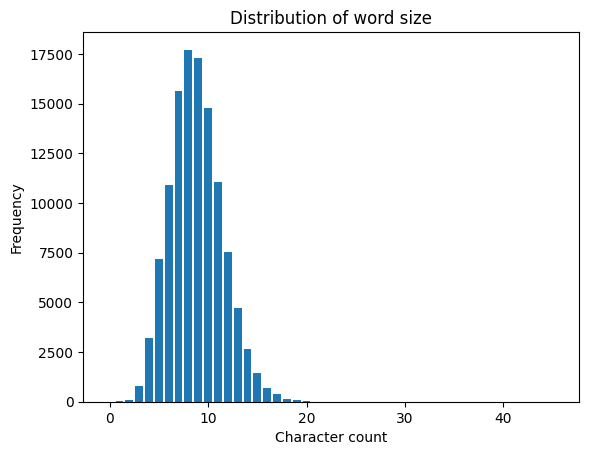

In [8]:
count_dict = split_by_character_count(words_list_final)
plot_word_counts(count_dict)

## Remove profanity

In [9]:
# Dataset
profanity_df = pd.read_csv("word_datasets/profanity_en.csv")
profanity_df_words_set = (set(profanity_df['text'])
                           .union(set(profanity_df['canonical_form_1']))
                           .union(set(profanity_df['canonical_form_2']))
                           .union(set(profanity_df['canonical_form_3'])))
len(profanity_df_words_set)

# Library: better_profanity
profanity.load_censor_words()

def is_profane(word):
    return profanity.contains_profanity(word) or word in profanity_df_words_set

In [10]:
# Iteration 1: generate a list of profane words
profane_words = [word for word in words_list_final if is_profane(word)]
len(profane_words)

499

In [11]:
# Iteration 2: use spaCy to identify lemmas

nlp = spacy.load("en_core_web_sm")
profane_lemmas_set = {token.lemma_.lower() for word in profane_words for token in nlp(word)}
len(profane_lemmas_set)

405

In [12]:
def is_profane_iter2(word):
    doc = nlp(word.lower())
    return any(token.lemma_ in profane_lemmas_set for token in doc)

In [13]:
profane_words_final = [word for word in words_list_final if is_profane_iter2(word)]
len(profane_words_final)

886

In [14]:
# Update the words list

words_list_final = list(set(words_list_final).difference(profane_words_final))
len(words_list_final)

115516

## Save the list of words

In [15]:
with open("words_v1.txt", "w", encoding="utf-8") as file:
    file.writelines(w + "\n" for w in words_list_final)

In [16]:
# Read the file to verify
with open("words_v1.txt", "r") as file:
    temp = file.read().split()
len(temp)

115516